In [1]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

In [2]:
def read_file(filename):
    with open(filename, "r") as fp:
        lines = fp.readlines()
    data = {}
    for line in lines[1:]:
        tokens = line.strip().split(',')
        method, bs, e2e, requests = tokens[0], int(tokens[1]), tokens[6], tokens[7]
        req_lat = [float(_) for _ in requests.split('+')]
        if 'nan' in e2e:
            req_lat = [0]
        data[(method, bs)] = (e2e, sum(req_lat)/len(req_lat), req_lat)
    return data

In [3]:
# data = read_file('shared_prompt_exp_2.csv')
data = {('vllm_diverged', 8): (' 122.745905982',
  14.516362960769232,
  [10.28447042,
   11.134411035,
   11.718761328,
   12.796555863,
   13.46115195,
   8.560789955,
   19.94581481,
   19.955273625,
   8.472846973,
   9.735769819,
   15.246178982,
   8.595708072,
   11.079026837,
   30.834130863,
   15.226253082,
   8.216428232,
   15.276051115,
   10.322664434,
   10.324315167,
   16.541619229,
   34.962541473,
   25.651620804,
   9.256551094,
   9.84473882,
   16.493726317,
   16.503970416,
   17.488305331,
   11.365138947,
   7.991469018,
   11.980870907,
   15.825797552,
   15.426444794,
   11.23892095,
   16.116979863,
   11.558933413,
   10.677873851,
   8.705805493,
   13.64553777,
   12.454405991,
   9.336300325,
   35.979376324,
   12.497734298,
   9.331464188,
   35.708496334,
   9.638933952,
   8.915082101,
   9.555763477,
   7.696516726,
   17.598611281,
   8.389761952,
   14.440701423,
   9.450664522,
   8.952710243,
   35.201822136,
   8.719868237,
   14.666084407,
   35.635024721,
   14.570889744,
   10.37523047,
   16.365775234,
   9.074110932,
   7.121462469,
   31.42892691,
   9.287056834,
   8.707368615]),
 ('vllm_diverged', 16): (' 109.950002164',
  25.257046498523085,
  [18.226492768,
   19.292945779,
   19.295102703,
   20.503722012,
   20.505887844,
   22.592805214,
   23.322326194,
   24.799642956,
   24.801910397,
   31.860275075,
   31.861980825,
   33.459328339,
   15.876566246,
   36.242277248,
   36.244067576,
   19.094619359,
   18.362235808,
   27.053658583,
   15.260464124,
   24.95442128,
   17.560905954,
   29.740625757,
   17.634917732,
   26.293311995,
   53.689106328,
   29.833492118,
   15.66431165,
   21.400567983,
   26.636917641,
   65.98657452,
   26.979448815,
   48.343947079,
   18.522546751,
   16.171327973,
   21.640888085,
   23.571766825,
   22.348607039,
   17.45244327,
   20.742718004,
   25.73175938,
   16.708085057,
   33.925112041,
   17.082129307,
   16.33892888,
   17.362857304,
   14.641576194,
   15.271279473,
   16.089653549,
   15.338863502,
   24.778042977,
   62.07396096,
   30.586080978,
   14.710861015,
   11.559388929,
   21.876195887,
   12.853564242,
   14.391624451,
   57.59872914,
   19.529553947,
   22.208031491,
   14.077902342,
   13.648486611,
   48.409143861,
   43.015235341,
   38.075819696]),
 ('vllm_diverged', 32): (' nan', 0.0, [0]),
 ('vllm_diverged', 64): (' nan', 0.0, [0]),
 ('vllm_shared', 8): (' 77.869626218',
  8.947042234676925,
  [5.501344966,
   5.842154986,
   5.968497591,
   6.48397269,
   6.672882659,
   5.079171697,
   11.108671973,
   11.110185854,
   4.998948823,
   6.009484357,
   9.338808435,
   5.128238692,
   6.452094897,
   17.409583302,
   9.432617439,
   5.234118241,
   9.467740177,
   6.521873124,
   6.518096979,
   10.49790718,
   21.352594152,
   16.385575737,
   5.707776332,
   6.172472782,
   9.751632215,
   9.753070974,
   10.543234818,
   6.337633469,
   5.000444393,
   7.188700696,
   9.602708866,
   9.664257438,
   7.409283765,
   10.63846579,
   7.372594771,
   6.622022148,
   5.623160293,
   8.657377851,
   7.655567838,
   5.786599808,
   22.133746784,
   7.328448264,
   5.485073041,
   22.309184435,
   5.753563546,
   5.488523589,
   6.010538121,
   5.216141831,
   11.215410216,
   5.465525128,
   8.99951465,
   5.96718696,
   5.512305394,
   22.233095734,
   5.934456847,
   9.324578538,
   22.210186142,
   9.234257624,
   6.588614306,
   10.355552468,
   5.964790238,
   4.869037107,
   20.854862146,
   7.570621026,
   7.530962921]),
 ('vllm_shared', 16): (' 64.4134026',
  14.07209113004615,
  [8.876803236,
   9.394028275,
   9.39857458,
   9.712425022,
   9.715579266,
   10.696372312,
   10.938378454,
   11.708207589,
   11.710686798,
   16.370690365,
   16.37191406,
   16.971453369,
   8.532280985,
   18.422850098,
   18.42426413,
   10.571054279,
   10.284428205,
   15.019473136,
   8.574619301,
   14.553086397,
   9.6664025,
   16.680721304,
   9.724824512,
   14.988781927,
   28.070171664,
   16.765665254,
   8.667082086,
   11.682210458,
   15.292616066,
   35.788367307,
   15.613980029,
   26.990717021,
   10.57305215,
   9.406211982,
   12.032190414,
   12.892427567,
   12.558313167,
   9.775888209,
   11.613272847,
   14.131531141,
   8.894027957,
   18.45797815,
   9.169198725,
   8.885271037,
   9.668231396,
   8.538541916,
   8.707534788,
   9.345185465,
   8.817544205,
   13.90986558,
   35.087812967,
   17.347729491,
   8.984603703,
   7.195661714,
   13.42521731,
   8.14746192,
   8.999219013,
   33.255669778,
   12.340052855,
   14.053054762,
   10.087388104,
   10.109238733,
   29.867990052,
   26.957083815,
   25.272762555]),
 ('vllm_shared', 32): (' 54.661013837',
  20.57043443001538,
  [13.791551849,
   14.367442208,
   14.370867562,
   14.37350113,
   14.819285781,
   14.821921615,
   15.29611813,
   16.292623345,
   16.29511623,
   16.813071655,
   18.061726234,
   18.063638231,
   18.065772172,
   18.068275697,
   19.521811715,
   19.52426192,
   21.118667624,
   25.981415226,
   25.982336614,
   26.869180685,
   26.871204081,
   26.872020351,
   26.874993777,
   26.877304522,
   14.823007847,
   29.576017003,
   29.577056302,
   29.579692566,
   29.583141495,
   13.300144019,
   15.388578008,
   17.349801102,
   13.704316592,
   15.25477628,
   18.897631975,
   19.993824811,
   13.305573103,
   17.714485215,
   18.952938228,
   20.864188044,
   11.818913099,
   11.821511722,
   11.867752548,
   13.052144491,
   12.528918496,
   25.51746522,
   9.428527407,
   41.237048933,
   41.240883324,
   11.915047184,
   22.557045556,
   12.609660619,
   10.936819532,
   16.770253803,
   15.91865378,
   15.307893151,
   13.517247524,
   16.353187056,
   46.250264058,
   46.254300039,
   13.068821103,
   35.975415227,
   33.121337349,
   33.126443715,
   27.023402071]),
 ('vllm_shared', 64): (' 50.268095041',
  34.990793157,
  [27.435230909,
   27.43574382,
   28.33612092,
   28.337704315,
   28.338872423,
   28.438103849,
   28.439372965,
   28.440120545,
   28.441182875,
   28.72028219,
   28.721291891,
   28.722715727,
   28.811159326,
   28.812450965,
   29.871988497,
   29.873610425,
   29.87501752,
   29.87646989,
   30.116916509,
   30.118762802,
   30.120559563,
   31.671004144,
   31.672538194,
   31.674221303,
   31.676140584,
   31.678102054,
   31.678537156,
   31.680371449,
   32.737307417,
   32.739410471,
   32.929981162,
   32.931657006,
   33.234537663,
   34.000487729,
   34.001386279,
   34.004250689,
   35.864120395,
   36.397506884,
   38.27018149,
   38.271124576,
   38.274437858,
   38.277063354,
   38.27971496,
   38.658693095,
   38.661322047,
   38.662320347,
   38.665624754,
   38.668344556,
   38.670091216,
   39.881054486,
   39.882407088,
   39.885902443,
   39.890902325,
   39.893637567,
   39.896148979,
   39.902251205,
   16.143816314,
   45.406841453,
   45.411434463,
   49.488345554,
   49.492283121,
   49.497085273,
   49.501207856,
   49.505651859,
   49.508428461]),
 ('parrot_shared', 8): (' 70.571116084',
  8.08071087736923,
  [5.061975357,
   5.382672408,
   5.505483708,
   5.968844373,
   6.148017256,
   4.56884128,
   10.116158718,
   10.117716973,
   4.5015936,
   5.417221703,
   8.429022086,
   4.663426445,
   5.881244836,
   15.860933226,
   8.547704123,
   4.729918769,
   8.582908405,
   5.879193446,
   5.878700734,
   9.482498267,
   19.30037087,
   14.75931786,
   5.117778896,
   5.503503761,
   8.755803186,
   8.75728542,
   9.457904993,
   5.651194702,
   4.465739596,
   6.438197943,
   8.584210644,
   8.653345676,
   6.640578791,
   9.514079167,
   6.623695527,
   5.937648868,
   5.031377741,
   7.80971575,
   6.908941473,
   5.232219804,
   19.878757662,
   6.665912093,
   5.039167218,
   20.130484101,
   5.266931835,
   4.981869607,
   5.44845782,
   4.637853843,
   10.124555445,
   4.891015854,
   8.094610423,
   5.360997878,
   5.030020178,
   20.114556557,
   5.321678505,
   8.391075566,
   20.037409517,
   8.286301677,
   5.854177153,
   9.296068376,
   5.315255761,
   4.379928557,
   18.797085542,
   7.032408704,
   7.002640776]),
 ('parrot_shared', 16): (' 49.890739363',
  10.61316638823077,
  [6.738232836,
   7.161344556,
   7.166002721,
   7.469323356,
   7.472559601,
   8.256757151,
   8.465366438,
   9.012709972,
   9.015187839,
   12.363948616,
   12.365153891,
   12.870821408,
   6.42264653,
   13.974822439,
   13.976166544,
   7.864243316,
   7.575036264,
   11.140282591,
   6.288355999,
   10.603861941,
   7.132644072,
   12.360199715,
   7.184846656,
   11.043713438,
   21.144878252,
   12.451506778,
   6.469590329,
   8.677092854,
   11.216117085,
   26.725209458,
   11.476517589,
   20.028498892,
   7.846214049,
   6.924801477,
   9.033397037,
   9.752171471,
   9.417628351,
   7.330291003,
   8.67558743,
   10.616354009,
   6.810416952,
   13.935017617,
   6.951835901,
   6.661032604,
   7.188025035,
   6.22013877,
   6.378300874,
   6.812043443,
   6.46915917,
   10.285023707,
   25.960929825,
   12.873530641,
   6.653071462,
   5.411631152,
   10.003823762,
   6.219663366,
   6.844819216,
   25.118053758,
   9.461325266,
   10.682022163,
   8.232649319,
   8.257625635,
   22.958056253,
   21.512128809,
   20.245406581]),
 ('parrot_shared', 32): (' 40.08059192',
  14.21825588049231,
  [9.549033938,
   9.941616696,
   9.945322144,
   9.947586393,
   10.371385166,
   10.373898913,
   10.775529189,
   11.427398696,
   11.429921931,
   11.874379122,
   12.633118279,
   12.635083469,
   12.637091749,
   12.639321183,
   13.704963962,
   13.707384504,
   14.78207835,
   17.618359983,
   17.619290456,
   18.287631277,
   18.289706679,
   18.29062432,
   18.29350435,
   18.296071955,
   10.032332581,
   20.204781089,
   20.205750146,
   20.208524669,
   20.211822874,
   8.814470206,
   10.269674902,
   11.670736059,
   9.017880789,
   10.157552893,
   12.658926817,
   13.478464935,
   8.680494775,
   11.651413077,
   12.565332874,
   13.829142293,
   8.030142097,
   8.032716277,
   8.066310357,
   8.945544737,
   8.529229605,
   17.217652498,
   6.313454683,
   28.103091325,
   28.107458362,
   8.086941212,
   15.008307891,
   8.582999929,
   7.435759464,
   11.653190063,
   11.183116141,
   10.867557319,
   9.731246323,
   11.781446874,
   32.273011653,
   32.277200036,
   9.591855356,
   26.127568231,
   24.239081732,
   24.243878735,
   21.030267649]),
 ('parrot_shared', 64): (' 32.96345386',
  20.974719311861545,
  [16.477161959,
   16.477774747,
   16.899317737,
   16.900886135,
   16.901985023,
   16.94869117,
   16.949960008,
   16.950774853,
   16.952042638,
   17.083222717,
   17.084135046,
   17.085561278,
   17.130020186,
   17.13123999,
   17.663169981,
   17.664793181,
   17.666259287,
   17.667699976,
   17.787552367,
   17.789334745,
   17.790966071,
   18.557542227,
   18.559069819,
   18.560662202,
   18.562405438,
   18.564431112,
   18.564790034,
   18.566641422,
   19.144014173,
   19.146159953,
   19.252555346,
   19.254273825,
   19.426093929,
   19.863684679,
   19.864575797,
   19.867360183,
   20.953144911,
   21.268515349,
   22.444442354,
   22.445392113,
   22.449132869,
   22.451785609,
   22.454329103,
   22.715867145,
   22.718541755,
   22.719728859,
   22.723270724,
   22.726232301,
   22.727607777,
   23.600298854,
   23.601650876,
   23.605535463,
   23.610305698,
   23.613047664,
   23.615842029,
   23.621532518,
   10.359406513,
   28.445045928,
   28.449882309,
   32.202818647,
   32.206918518,
   32.211230054,
   32.215573941,
   32.220074102,
   32.222792054])}

In [64]:
data

{('vllm_diverged', 8): (' 122.745905982',
  14.516362960769232,
  [10.28447042,
   11.134411035,
   11.718761328,
   12.796555863,
   13.46115195,
   8.560789955,
   19.94581481,
   19.955273625,
   8.472846973,
   9.735769819,
   15.246178982,
   8.595708072,
   11.079026837,
   30.834130863,
   15.226253082,
   8.216428232,
   15.276051115,
   10.322664434,
   10.324315167,
   16.541619229,
   34.962541473,
   25.651620804,
   9.256551094,
   9.84473882,
   16.493726317,
   16.503970416,
   17.488305331,
   11.365138947,
   7.991469018,
   11.980870907,
   15.825797552,
   15.426444794,
   11.23892095,
   16.116979863,
   11.558933413,
   10.677873851,
   8.705805493,
   13.64553777,
   12.454405991,
   9.336300325,
   35.979376324,
   12.497734298,
   9.331464188,
   35.708496334,
   9.638933952,
   8.915082101,
   9.555763477,
   7.696516726,
   17.598611281,
   8.389761952,
   14.440701423,
   9.450664522,
   8.952710243,
   35.201822136,
   8.719868237,
   14.666084407,
   35.635

In [4]:

batch_sizes = [8,16,32,64]
systems = ['parrot_shared', 'vllm_shared', 'vllm_diverged', ]
hatches = ['', '', '', 'x']
colors = [
"gray",
"#a9a9a9",
"black",
"#4575b4"]

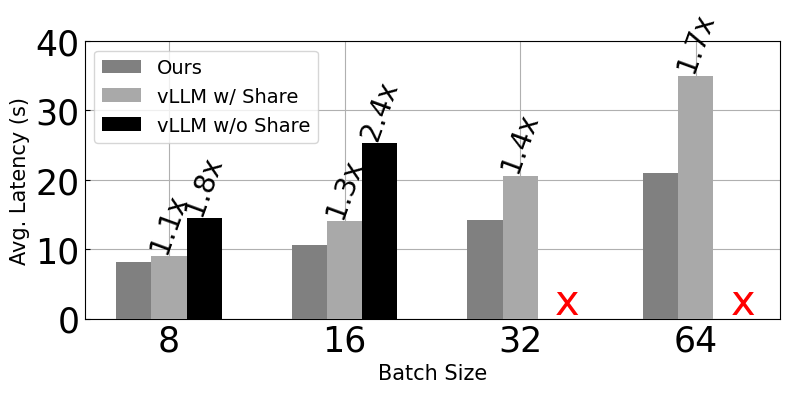

In [5]:

names = {
    'parrot_shared': 'Ours',
    'vllm_shared': 'vLLM w/ Share',
    'vllm_diverged': 'vLLM w/o Share'
}

# Generate the chart
x = np.arange(len(batch_sizes))
width = 0.2

fig, ax = plt.subplots(1, 1, figsize=(8,4))

plt.grid(True)
rects = []
for i, system in enumerate(systems):
    rect = ax.bar(x - width/2 + i*width-0.1, [data[(system,bs)][1] for bs in batch_sizes], width,  hatch = hatches[i], color = colors[i], label=names[system],zorder=3) # hatches
    rects.append(rect)

    if system == 'parrot_shared':
        continue
    speedup_values = [data[(system,bs)][1]/data[('parrot_shared',bs)][1] for bs in batch_sizes]
    for rect, speedup in zip(rect, speedup_values):
        if speedup < 0.1:
            continue
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height,
                '{:.1f}x'.format(speedup),
                ha='center', va='bottom', rotation=70,
                fontsize=20)
    
ax.text(2.2, 0.6, 'x', color='r', fontsize=30)
ax.text(3.2, 0.6, 'x', color='r', fontsize=30)
# plt.legend(loc='upper left', prop = { "size": 18 },)
ax.tick_params(axis='y', labelsize=25, direction='in')
ax.tick_params(axis='x', labelsize=25, direction='in')
ax.set_xlabel('Batch Size', fontsize=15)
ax.set_ylabel('Avg. Latency (s)', fontsize=15)
ax.set_xticks([_ for _ in x])
ax.set_xticklabels(batch_sizes)
plt.legend(loc='upper left', prop = { "size": 14 }) #, bbox_to_anchor= (0., 0.97))
plt.ylim([0,40])
plt.yticks([0,10,20,30,40])

plt.tight_layout()
plt.savefig('share_bs.pdf')